In this assignment, we consider the labour market.



In [1]:
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline


# production function



We use a standard CES production function:

$$
y = (\alpha K^\gamma + (1-\alpha) L^\gamma)^{1/\gamma}
$$

From this production function we derive labour demand. We also specify labour supply.



In [2]:
alpha = 0.25
beta = 0.5
K = 1

def production_function(K,L,gamma):
    return (alpha*K**gamma + (1-alpha)*L**gamma)**(1/gamma)

def labour_demand(gamma,real_wage):
    labour =  optimize.fminbound(lambda l: -(production_function(K,l,gamma)-real_wage*l),0,100,full_output=1)
    return labour[0]

def labour_supply(real_wage):
    return real_wage**beta

Now we can plot labour demand and supply as a function of the real wage $w/p$.



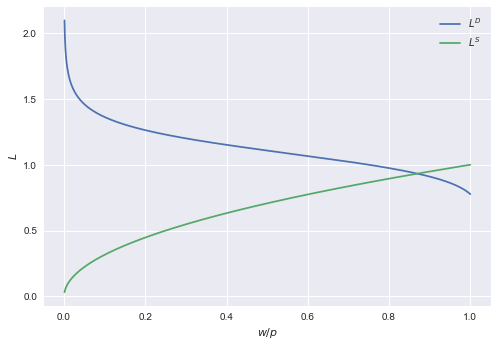

In [3]:
gamma = -10

range_realwage = arange(0.001,1.0,0.0001)
range_demand = [labour_demand(gamma,w) for w in range_realwage]
range_supply = [labour_supply(w) for w in range_realwage]
plt.style.use('seaborn')
plt.clf()
plt.plot(range_realwage,range_demand, label = '$L^D$')
plt.plot(range_realwage,range_supply, label = '$L^S$')
plt.xlabel('$w/p$')
plt.ylabel('$L$')
plt.legend()

We can solve for the equilibrium value.



In [4]:
initial_guess = 0.8
optimize.fsolve(lambda w: labour_demand(gamma,w)-labour_supply(w), initial_guess)

array([ 0.86949312])

---

**Exercise**

Calculate equilibrium output $y$.

---




# Out of equilibrium



Assume that the nominal wage $W$ is fixed. We would like to plot labour $L$ and output $y$ as a function of $p$.



In [5]:
W = 0.01

def labour_out_of_equilibrium(p,gamma):
    l = min(labour_demand(gamma,W/p), labour_supply(W/p))
    return l

---

**Exercise**

1.  explain the code above.
2.  plot output $y$ as a function of $p$.

---




# Taxation



In this framework, we can introduce taxation. With a social security tax $t_{worker}$, labour supply gets the following form.



In [6]:
def labour_supply_t(real_wage,t):
    return ((1-t_worker)*w/p)